<a href="https://colab.research.google.com/github/subin100/DataVisualization/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exam 1
###Subin Manandhar
### CPSMA 4313
###instructor: Dr Nicholas Jacob


Loading the libraries 

In [70]:
import requests
import pandas as pa
from bs4 import BeautifulSoup


In [69]:

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


#Resources

https://github.com/nurfnick/Data_Viz

https://github.com/subin100/DataVisualization


“I attest that the resources above were the only ones utilized in completing
the exam and the work included is my own and no one else from the course.”

#1.

In [71]:
r = requests.get('https://en.wikipedia.org/wiki/List of mountains by elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")

Display the title for the page

In [72]:
html_soup.title

<title>List of mountains by elevation - Wikipedia</title>

a. Store the data as a pandas dataframe

In [73]:
tables = html_soup.find_all('table',class_="wikitable")
df = pa.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


b. Return only mountains in the ‘Himalayas’

In [74]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


c. Create a barchart of the Ranges

Range
Himalayas    AxesSubplot(0.125,0.125;0.775x0.755)
Karakoram    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Metres, dtype: object

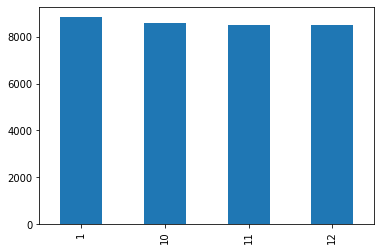

In [75]:
df.groupby('Range')['Metres'].plot(kind ='bar')

d. Create a box-plot of the height in Feet

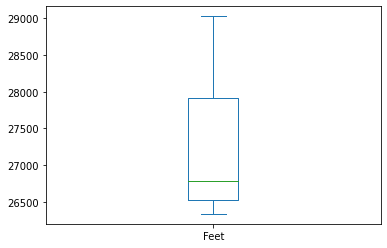

In [76]:
df.Feet.plot(kind = 'box')

e. Report the mean, standard deviation and five number summary of the height in Feet

In [77]:
df.Feet.describe()

count       14.000000
mean     27178.000000
std        879.489537
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64

f. Report the mean and median of mountains when grouped by their Range.

In [80]:
df.groupby('Range').agg(['mean','median'])

Metres             Feet         
              mean  median     mean   median
Range                                       
Himalayas  8319.70  8177.5  27295.6  26829.5
Karakoram  8194.25  8065.5  26884.0  26461.5

#2.

Before we go to number 2. 

Let's print some data from ‘chicago taxi trips.taxi trips which will make it easier to work on it.

Printing 5 data from the dataset

In [79]:
%%bigquery --project datavisualization-338803
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
LIMIT 5

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3190243aa353d190bf2e5f366cd61617fa96f6a8,9d4a0cf00e9283302f40800a5da6e7017db07876ff895d...,2015-08-26 11:15:00+00:00,2015-08-26 11:15:00+00:00,0,0.0,None,None,None,None,5.85,1.46,0.0,0.0,7.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
1,6d5b6e5f3e5397f08e770beeb5f34433b0491d12,c2ca667849d5b9c2d10a15bf7e6a6ab358ab7a98cce37b...,2014-08-01 21:45:00+00:00,2014-08-01 21:45:00+00:00,0,0.0,None,None,None,None,8.45,0.00,0.0,0.0,8.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,980c986313ec13a9d59412826c83bfa65e01d0c3,60e9b32a85d0045d670d329891f51b9796543659769e9a...,2014-08-01 18:45:00+00:00,2014-08-01 18:45:00+00:00,0,0.0,None,None,None,None,6.05,2.00,0.0,0.0,8.05,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
3,29aea409062ff5c29c33fecff902acd8e58e5e0f,73f6888d8d8f9808f6624377edfa1e2a0a574b06eafbc9...,2014-07-31 09:45:00+00:00,2014-07-31 09:45:00+00:00,0,0.0,None,None,None,None,10.05,2.01,0.0,0.0,12.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
4,e83f8835694883f25c11fc70bdf8443b5c68448f,55af2e70fd4624a43fea70121974c54db44c8e7582ce3d...,2014-07-16 08:45:00+00:00,2014-07-16 08:45:00+00:00,0,0.0,None,None,None,None,3.25,0.00,0.0,1.0,4.25,Cash,Blue Ribbon Taxi Association Inc.,None,None,None,None,None,None


a. How many rows are in the dataset?

In [43]:
%%bigquery --project datavisualization-338803
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


b. What is the average trip total based on payment type?

In [49]:
%%bigquery --project datavisualization-338803
SELECT payment_type as payment_type,
AVG(table.trip_total) as average_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` as table
GROUP BY payment_type

,payment_type,average_trip_total
0,Dispute,15.496588
1,Pcard,10.116931
2,Unknown,17.649893
3,Mobile,20.339910
4,No Charge,15.836177
5,Way2ride,16.639366
6,Split,18.788039
7,Credit Card,20.524892
8,Prcard,20.320682
9,Prepaid,22.377662


c. How many trips, that had a non-zero recorded time, were above the average time?

In [66]:
%%bigquery --project datavisualization-338803
SELECT COUNT(*) as average_nonZero
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds > 0 AND trip_seconds > (SELECT AVG(trip_seconds) as average_trip_total FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)


,average_nonZero
0,62143014


#3.


###a. Approximately how long did you work on this exam?

I spent about 2 hours on this exam.

###b. Which was the hardest and easiest topic from this section?

I found, calculating non zero recorded time the hardest. I spent about an hour on that part. I looked at all the references but couldn't figure out the solutions. I. tried many methods to do the problem and finally, somehow it worked

###c. Which method of gathering data are you most excited to use again?

I think, I would use twitter method of gathering data in the future because  in my opinion, collecting data from social medias would play a huge part in the future.